In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

In [4]:
dataset = [[2, 3, 0], 
           [4, 5, 0],
           [11, 11, 1],
           [4, 11, 1],
           [12, 5, 0],
           [5, 2, 0],
           [6, 1, 0],
           [6, 3, 0],
           [2, 10, 1],
           [4, 7, 1],
           [13, 8, 0],
           [1, 6, 1],
           [6, 9, 1],
           [10, 12, 1],
           [8, 3, 0],
           [2, 8, 1]]
           
# (bias, w1 and w2).
weights = [.05, .05, .05]
dataset = normalize(dataset, axis=0, norm='max')
dataset

array([[0.15384615, 0.25      , 0.        ],
       [0.30769231, 0.41666667, 0.        ],
       [0.84615385, 0.91666667, 1.        ],
       [0.30769231, 0.91666667, 1.        ],
       [0.92307692, 0.41666667, 0.        ],
       [0.38461538, 0.16666667, 0.        ],
       [0.46153846, 0.08333333, 0.        ],
       [0.46153846, 0.25      , 0.        ],
       [0.15384615, 0.83333333, 1.        ],
       [0.30769231, 0.58333333, 1.        ],
       [1.        , 0.66666667, 0.        ],
       [0.07692308, 0.5       , 1.        ],
       [0.46153846, 0.75      , 1.        ],
       [0.76923077, 1.        , 1.        ],
       [0.61538462, 0.25      , 0.        ],
       [0.15384615, 0.66666667, 1.        ]])

In [5]:
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1


In [6]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.5 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [7]:
l_rate = 0.1
n_epoch = 20
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=9.000
>epoch=1, lrate=0.100, error=3.000
>epoch=2, lrate=0.100, error=4.000
>epoch=3, lrate=0.100, error=6.000
>epoch=4, lrate=0.100, error=4.000
>epoch=5, lrate=0.100, error=4.000
>epoch=6, lrate=0.100, error=4.000
>epoch=7, lrate=0.100, error=3.000
>epoch=8, lrate=0.100, error=2.000
>epoch=9, lrate=0.100, error=2.000
>epoch=10, lrate=0.100, error=2.000
>epoch=11, lrate=0.100, error=2.000
>epoch=12, lrate=0.100, error=2.000
>epoch=13, lrate=0.100, error=2.000
>epoch=14, lrate=0.100, error=0.000
>epoch=15, lrate=0.100, error=0.000
>epoch=16, lrate=0.100, error=0.000
>epoch=17, lrate=0.100, error=0.000
>epoch=18, lrate=0.100, error=0.000
>epoch=19, lrate=0.100, error=0.000
[-0.19999999999999998, -0.43076923076923057, 0.625]


In [8]:
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1


In [9]:
arr = np.array(dataset)
X = arr[::,0:2]
y = arr[::,-1]

0.6892307692307689 0.31999999999999995


[]

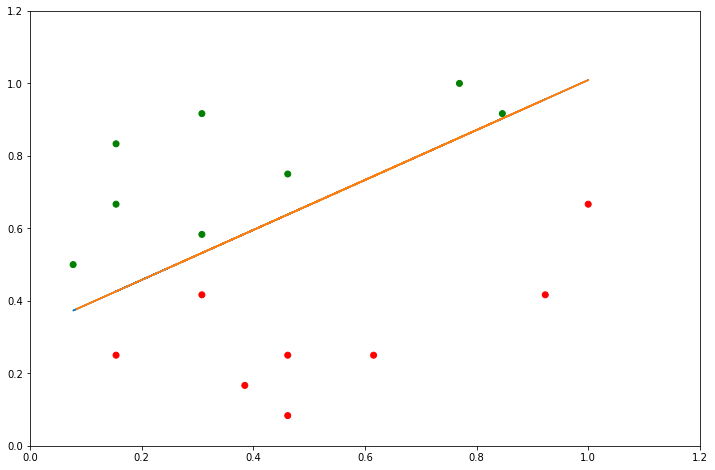

In [10]:
fig, ax = plt.subplots()
colors = ['red','green']
xmin, xmax = 0, 1.2
ax.scatter(arr[::,0:1], arr[::,1:2], c=arr[::,2:], cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 1.2])
m = -weights[1] / weights[2]
c = -weights[0] / weights[2]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()